In [11]:
!pip install gnews pandas

import os
import pandas as pd
from gnews import GNews
from datetime import datetime, timedelta, timezone

# 🔑 Add your API key here (locally only)
os.environ["GNEWS_API_KEY"] = "2b328c4809a88cfa5b2799b6d5e14add"

# 🏢 Stock name
STOCK_NAME = "TCS"

# 📅 Date span (last N days)
DAYS_BACK = 7

end_date = datetime.now(timezone.utc)
start_date = end_date - timedelta(days=DAYS_BACK)

# Initialize GNews
google_news = GNews(
    language="en",
    country="IN",
    max_results=10,
    start_date=start_date,
    end_date=end_date
)

# Fetch news
news = google_news.get_news(STOCK_NAME)

# Build rows for DataFrame
rows = []

for article in news:
    rows.append({
        "stock": STOCK_NAME,
        "text": article.get("title", ""),
        "date": article.get("published date", None)
    })

# Create DataFrame
df = pd.DataFrame(rows)

# Display DataFrame
df


,stock,text,date
0,TCS,"₹25,000 to ₹22,800: A TCS employee’s pay went ...","Wed, 14 Jan 2026 04:21:54 GMT"
1,TCS,Newsweek Ranks TCS #1 Among Technology Service...,"Wed, 14 Jan 2026 20:30:55 GMT"
2,TCS,TCS headcount dips sharply: Why is India's IT ...,"Fri, 16 Jan 2026 03:38:33 GMT"
3,TCS,TCS CEO K Krithivasan betting on strong FY26 d...,"Tue, 13 Jan 2026 10:36:03 GMT"
4,TCS,TCS to Continue Job Cuts after Reducing Headco...,"Wed, 14 Jan 2026 05:45:36 GMT"
5,TCS,Tech wreck: Job cuts at TCS drag Big 5 IT comp...,"Fri, 16 Jan 2026 21:13:00 GMT"
6,TCS,"TCS cuts down jobs of more than 30,000 employe...","Tue, 13 Jan 2026 09:56:57 GMT"
7,TCS,"The Pink Slip Season Isn’t Over! TCS Cuts 30,0...","Tue, 13 Jan 2026 13:06:20 GMT"
8,TCS,TCS incorporates regional HQ in Saudi Arabia -...,"Mon, 19 Jan 2026 22:17:00 GMT"
9,TCS,"TCS Voluntary Exits Cross 22,000 In Two Quarte...","Wed, 14 Jan 2026 05:36:45 GMT"


In [12]:
import re
import pandas as pd

# Simple text preprocessing function (FinBERT-friendly)
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    
    text = text.lower()                      # lowercase
    text = re.sub(r"http\S+", "", text)      # remove URLs
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # remove special characters
    text = re.sub(r"\s+", " ", text).strip()   # remove extra spaces
    
    return text

# Apply preprocessing
df["clean_text"] = df["text"].apply(preprocess_text)

# Display the updated DataFrame
df


,stock,text,date,clean_text
0,TCS,"₹25,000 to ₹22,800: A TCS employee’s pay went ...","Wed, 14 Jan 2026 04:21:54 GMT",25000 to 22800 a tcs employees pay went backwa...
1,TCS,Newsweek Ranks TCS #1 Among Technology Service...,"Wed, 14 Jan 2026 20:30:55 GMT",newsweek ranks tcs 1 among technology service ...
2,TCS,TCS headcount dips sharply: Why is India's IT ...,"Fri, 16 Jan 2026 03:38:33 GMT",tcs headcount dips sharply why is indias it se...
3,TCS,TCS CEO K Krithivasan betting on strong FY26 d...,"Tue, 13 Jan 2026 10:36:03 GMT",tcs ceo k krithivasan betting on strong fy26 d...
4,TCS,TCS to Continue Job Cuts after Reducing Headco...,"Wed, 14 Jan 2026 05:45:36 GMT",tcs to continue job cuts after reducing headco...
5,TCS,Tech wreck: Job cuts at TCS drag Big 5 IT comp...,"Fri, 16 Jan 2026 21:13:00 GMT",tech wreck job cuts at tcs drag big 5 it compa...
6,TCS,"TCS cuts down jobs of more than 30,000 employe...","Tue, 13 Jan 2026 09:56:57 GMT",tcs cuts down jobs of more than 30000 employee...
7,TCS,"The Pink Slip Season Isn’t Over! TCS Cuts 30,0...","Tue, 13 Jan 2026 13:06:20 GMT",the pink slip season isnt over tcs cuts 30000 ...
8,TCS,TCS incorporates regional HQ in Saudi Arabia -...,"Mon, 19 Jan 2026 22:17:00 GMT",tcs incorporates regional hq in saudi arabia t...
9,TCS,"TCS Voluntary Exits Cross 22,000 In Two Quarte...","Wed, 14 Jan 2026 05:36:45 GMT",tcs voluntary exits cross 22000 in two quarter...


Device set to use cpu


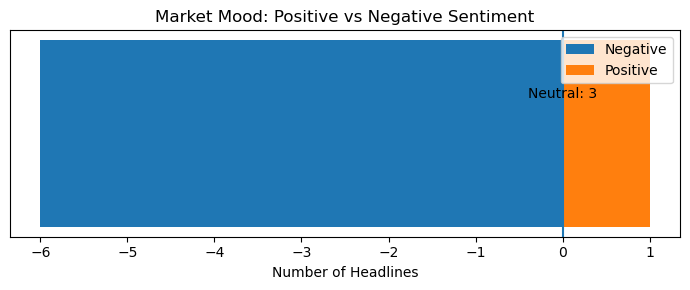

,stock,text,date,clean_text,sentiment_label,sentiment_score
0,TCS,"₹25,000 to ₹22,800: A TCS employee’s pay went ...","Wed, 14 Jan 2026 04:21:54 GMT",25000 to 22800 a tcs employees pay went backwa...,neutral,0.692055
1,TCS,Newsweek Ranks TCS #1 Among Technology Service...,"Wed, 14 Jan 2026 20:30:55 GMT",newsweek ranks tcs 1 among technology service ...,neutral,0.559457
2,TCS,TCS headcount dips sharply: Why is India's IT ...,"Fri, 16 Jan 2026 03:38:33 GMT",tcs headcount dips sharply why is indias it se...,negative,0.965371
3,TCS,TCS CEO K Krithivasan betting on strong FY26 d...,"Tue, 13 Jan 2026 10:36:03 GMT",tcs ceo k krithivasan betting on strong fy26 d...,positive,0.945224
4,TCS,TCS to Continue Job Cuts after Reducing Headco...,"Wed, 14 Jan 2026 05:45:36 GMT",tcs to continue job cuts after reducing headco...,negative,0.856804
5,TCS,Tech wreck: Job cuts at TCS drag Big 5 IT comp...,"Fri, 16 Jan 2026 21:13:00 GMT",tech wreck job cuts at tcs drag big 5 it compa...,negative,0.965005
6,TCS,"TCS cuts down jobs of more than 30,000 employe...","Tue, 13 Jan 2026 09:56:57 GMT",tcs cuts down jobs of more than 30000 employee...,negative,0.973484
7,TCS,"The Pink Slip Season Isn’t Over! TCS Cuts 30,0...","Tue, 13 Jan 2026 13:06:20 GMT",the pink slip season isnt over tcs cuts 30000 ...,negative,0.965209
8,TCS,TCS incorporates regional HQ in Saudi Arabia -...,"Mon, 19 Jan 2026 22:17:00 GMT",tcs incorporates regional hq in saudi arabia t...,neutral,0.920303
9,TCS,"TCS Voluntary Exits Cross 22,000 In Two Quarte...","Wed, 14 Jan 2026 05:36:45 GMT",tcs voluntary exits cross 22000 in two quarter...,negative,0.884368


In [15]:
# Install once
!pip install transformers torch matplotlib

import numpy as np
import matplotlib.pyplot as plt
from transformers import pipeline

# -----------------------------
# 1. FinBERT (PyTorch only)
# -----------------------------
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="ProsusAI/finbert",
    framework="pt"
)

results = sentiment_pipeline(df["clean_text"].tolist())

# 🔥 STORE BOTH LABEL AND SCORE
df["sentiment_label"] = [r["label"] for r in results]
df["sentiment_score"] = [r["score"] for r in results]

# -----------------------------
# 2. Aggregate sentiment counts
# -----------------------------
pos = (df["sentiment_label"] == "positive").sum()
neg = (df["sentiment_label"] == "negative").sum()
neu = (df["sentiment_label"] == "neutral").sum()

# -----------------------------
# 3. Explicit Positive vs Negative Plot
# -----------------------------
fig, ax = plt.subplots(figsize=(7, 3))

ax.barh(0, -neg, label="Negative")
ax.barh(0, pos, label="Positive")

ax.text(0, 0.15, f"Neutral: {neu}", ha="center", fontsize=10)
ax.axvline(0)

ax.set_yticks([])
ax.set_xlabel("Number of Headlines")
ax.set_title("Market Mood: Positive vs Negative Sentiment")
ax.legend(loc="upper right")

plt.tight_layout()
plt.show()

df


=== Confidence Summary ===
Average confidence : 0.87
Minimum confidence : 0.56
Maximum confidence : 0.97

=== Average Confidence by Sentiment ===
sentiment_label
negative    0.935040
neutral     0.723938
positive    0.945224
Name: sentiment_score, dtype: float64

High-confidence predictions (≥ 0.8): 8 / 10 (80%)


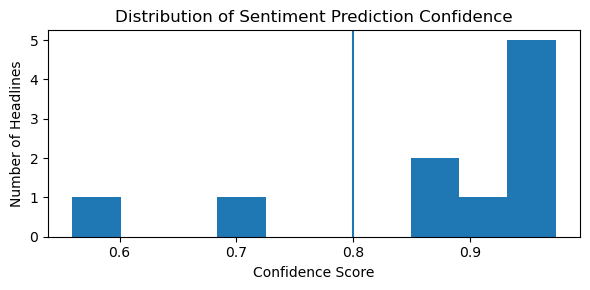


Low-confidence predictions (score < 0.6):


,text,sentiment_label,sentiment_score
1,Newsweek Ranks TCS #1 Among Technology Service...,neutral,0.559457


In [16]:
import matplotlib.pyplot as plt

# -----------------------------
# 1. Overall confidence metrics
# -----------------------------
avg_conf = df["sentiment_score"].mean()
min_conf = df["sentiment_score"].min()
max_conf = df["sentiment_score"].max()

print("=== Confidence Summary ===")
print(f"Average confidence : {avg_conf:.2f}")
print(f"Minimum confidence : {min_conf:.2f}")
print(f"Maximum confidence : {max_conf:.2f}")

# -----------------------------
# 2. Confidence by sentiment type
# -----------------------------
print("\n=== Average Confidence by Sentiment ===")
print(df.groupby("sentiment_label")["sentiment_score"].mean())

# -----------------------------
# 3. High-confidence predictions
# -----------------------------
THRESHOLD = 0.80

high_conf_df = df[df["sentiment_score"] >= THRESHOLD]
ratio = len(high_conf_df) / len(df) if len(df) > 0 else 0

print(f"\nHigh-confidence predictions (≥ {THRESHOLD}): "
      f"{len(high_conf_df)} / {len(df)} ({ratio:.0%})")

# -----------------------------
# 4. Confidence distribution plot
# -----------------------------
plt.figure(figsize=(6, 3))
plt.hist(df["sentiment_score"], bins=10)
plt.axvline(THRESHOLD)
plt.xlabel("Confidence Score")
plt.ylabel("Number of Headlines")
plt.title("Distribution of Sentiment Prediction Confidence")
plt.tight_layout()
plt.show()

# -----------------------------
# 5. Low-confidence examples
# -----------------------------
print("\nLow-confidence predictions (score < 0.6):")
df[df["sentiment_score"] < 0.6][
    ["text", "sentiment_label", "sentiment_score"]
]
